In [66]:
import pandas as pd 
import numpy as np 
import pickle
import os
import helper_functions as hf
import matplotlib.pyplot as plt

In [67]:
data_dir = "C:/Users/juiha/OneDrive - Drexel University/Drexel/terms/term11/ECES 487/project/clustering_embeddings/microbiome_glove_embedding/data"
fig_dir = "C:/Users/juiha/OneDrive - Drexel University/Drexel/terms/term11/ECES 487/project/clustering_embeddings/microbiome_glove_embedding/figures"

In [68]:
f = open(os.path.join(data_dir, "X_sample_property.obj"), "rb")
X = pickle.load(f)
f.close()

In [69]:
f = open(os.path.join(data_dir, "y_sample_ibd.obj"), "rb")
y = pickle.load(f)
f.close()

In [70]:
y = list(y[0].values)
# Imbalanced data set: only 317 samples have IBD out of 5874

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [72]:
from sklearn.naive_bayes import GaussianNB 
# Input data has negative values, MultinomialNB and ComplementNG cannot be used. 
clf = GaussianNB()
model = clf.fit(X_train, y_train)

In [73]:
predicted_y = model.predict(X_test)


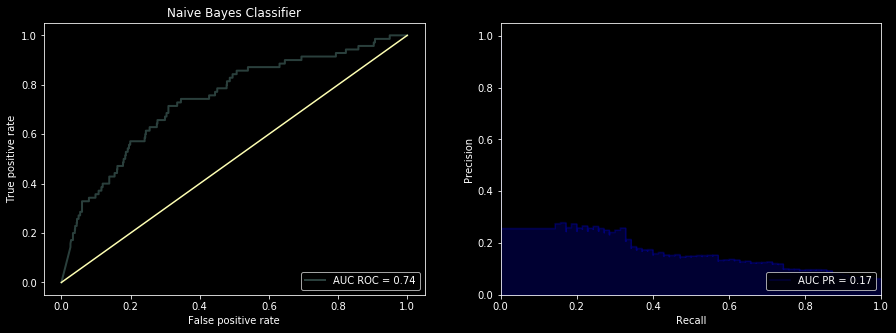

In [74]:
f = plt.figure(figsize=(15,5))
roc_auc, fpr, tpr, average_precision, f1, f2 = hf.computeMLstats(model, X_test, y_test, plot=True, plot_pr=True, graph_title = "Naive Bayes Classifier", flipped = False)
f.savefig(os.path.join(fig_dir, "naive_bayes_classifier.pdf"))